In [1]:
import requests
import datetime
import time
import re
import xarray as xr
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [2]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/friedrich.knuth@rutgers.edu/20180420T212820-RS03ASHS-MJ03B-07-TMPSFA301-streamed-tmpsf_sample/catalog.html'
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]

In [3]:
ds = xr.open_mfdataset(datasets)
ds = ds.swap_dims({'obs': 'time'})
ds = ds.chunk({'time': 100})

In [4]:
temperature = ds['temperature12'].values.tolist()
time = []
time_pd = pd.to_datetime(ds.time.values.tolist())
for i in time_pd:
    i = np.datetime64(i).astype(datetime.datetime)
    time.append(dates.date2num(i)) 

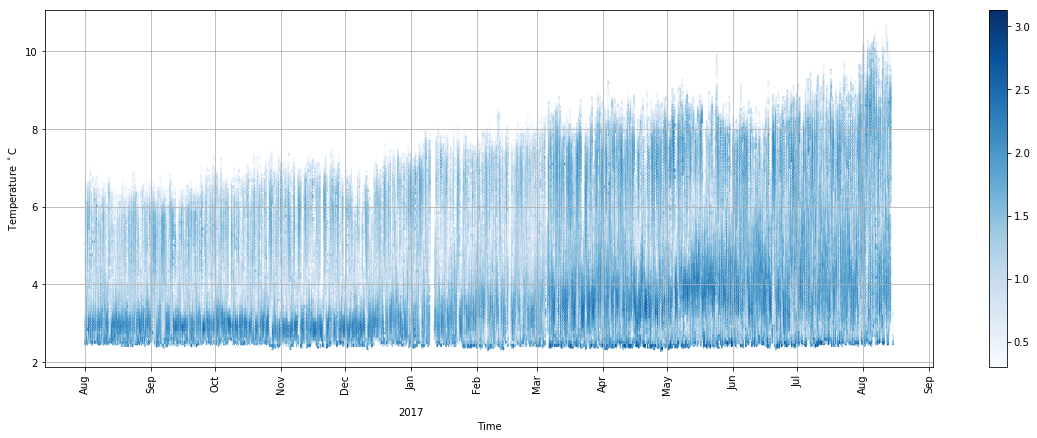

In [5]:
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

hb1 = ax.hexbin(time, temperature, bins='log', vmin=0.4, vmax=3, gridsize=(1100, 100), mincnt=1, cmap='Blues')
fig.colorbar(hb1)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
years = dates.YearLocator()
months = dates.MonthLocator()
yearsFmt = dates.DateFormatter('\n\n\n%Y')
monthsFmt = dates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(years)
ax.xaxis.set_minor_formatter(yearsFmt)
plt.tight_layout()
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.ylabel('Temperature $^\circ$C')
plt.xlabel('Time')
plt.show()

In [6]:
df = ds['temperature12'].to_dataframe()

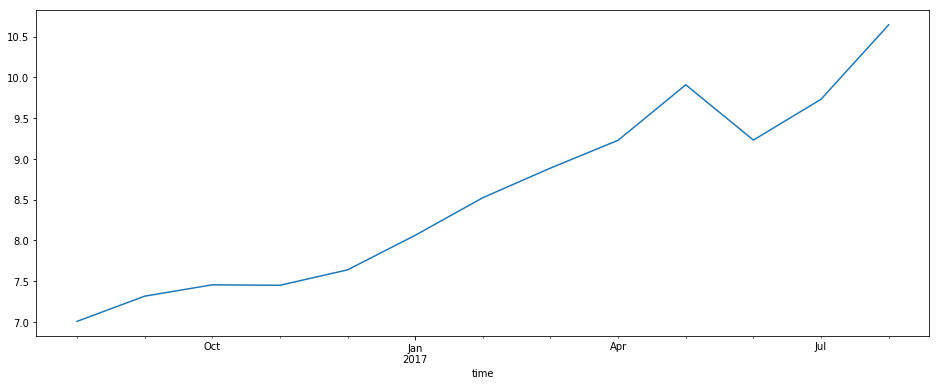

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
df['temperature12'].resample('M').max().plot(ax=ax)
plt.show()